In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [3]:
df.shape

(962, 2)

In [4]:
df['Category'].value_counts()

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [5]:
round(df['Category'].value_counts(normalize=True)*100,2)

Java Developer               8.73
Testing                      7.28
DevOps Engineer              5.72
Python Developer             4.99
Web Designing                4.68
HR                           4.57
Hadoop                       4.37
Blockchain                   4.16
ETL Developer                4.16
Operations Manager           4.16
Data Science                 4.16
Sales                        4.16
Mechanical Engineer          4.16
Arts                         3.74
Database                     3.43
Electrical Engineering       3.12
Health and fitness           3.12
PMO                          3.12
Business Analyst             2.91
DotNet Developer             2.91
Automation Testing           2.70
Network Security Engineer    2.60
SAP Developer                2.49
Civil Engineer               2.49
Advocate                     2.08
Name: Category, dtype: float64

# Visual Representation

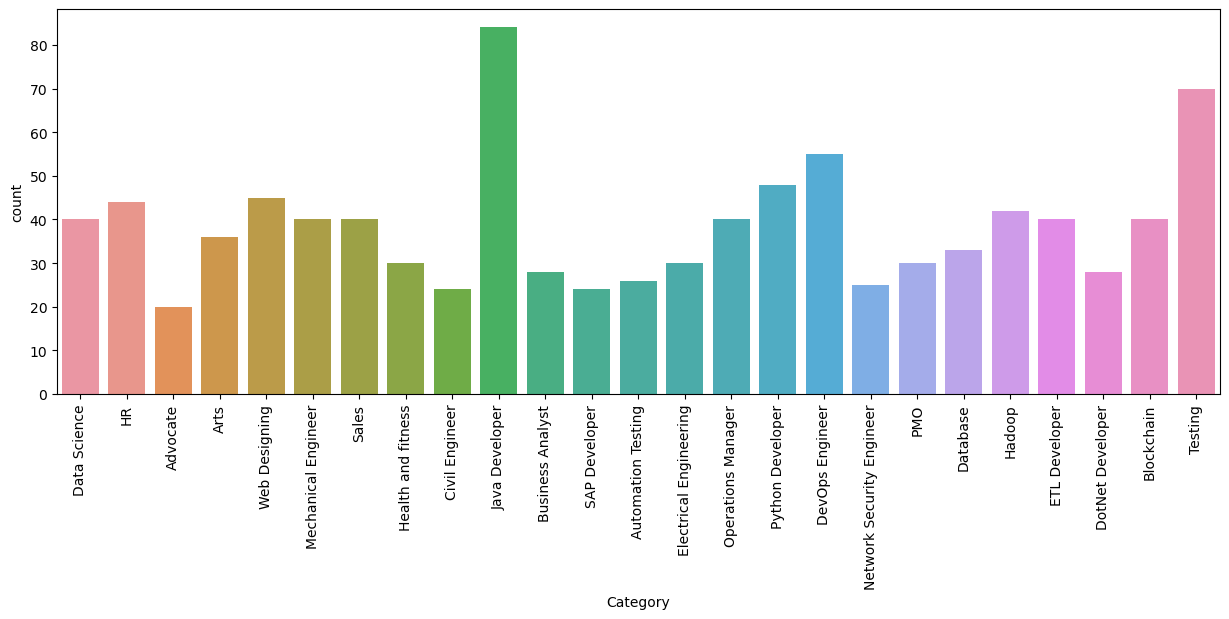

In [6]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Category')
plt.xticks(rotation=90)
plt.show()

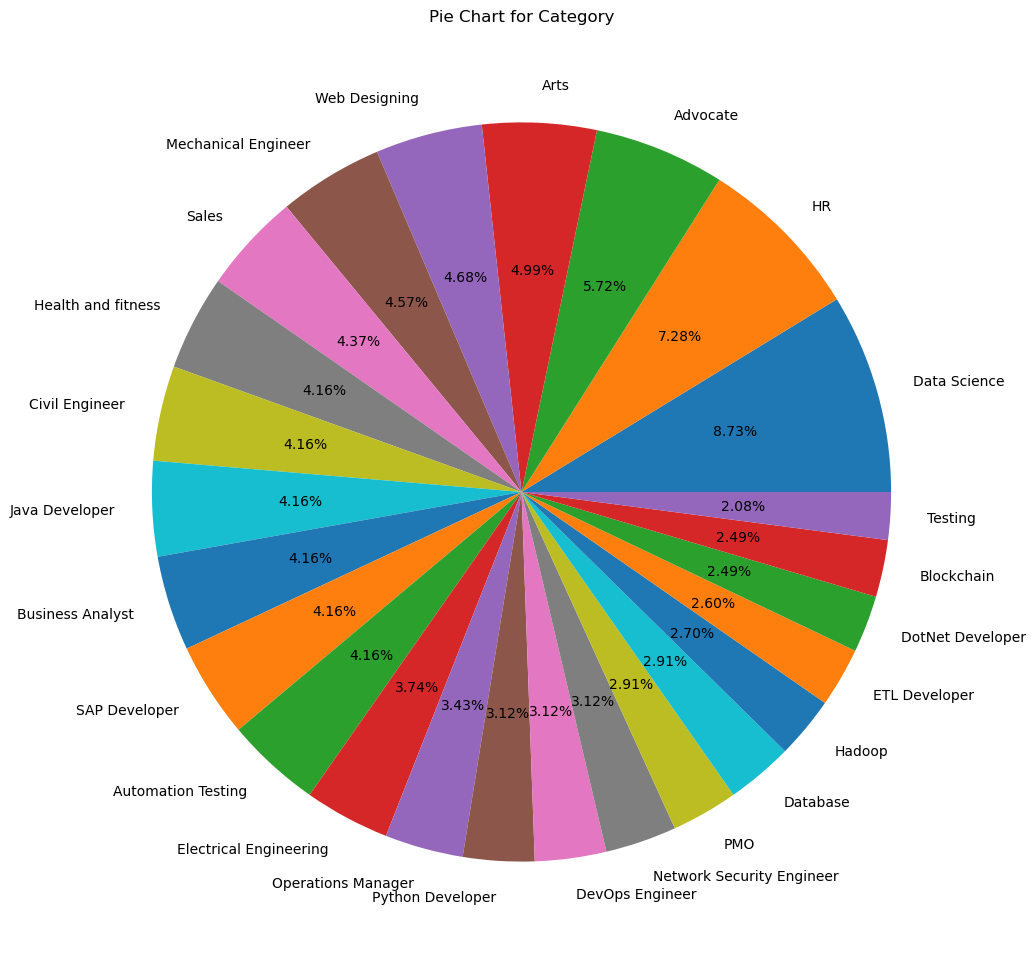

In [7]:
plt.figure(figsize=[17,12])
plt.pie(df['Category'].value_counts(),labels=df['Category'].unique(),autopct='%1.2f%%')
plt.title('Pie Chart for Category')
plt.show()

# Data preprocessing

In [8]:
import re

In [9]:
df['Resume'][0]

'Skills * Programming Languages: Python (pandas, numpy, scipy, scikit-learn, matplotlib), Sql, Java, JavaScript/JQuery. * Machine learning: Regression, SVM, NaÃ¯ve Bayes, KNN, Random Forest, Decision Trees, Boosting techniques, Cluster Analysis, Word Embedding, Sentiment Analysis, Natural Language processing, Dimensionality reduction, Topic Modelling (LDA, NMF), PCA & Neural Nets. * Database Visualizations: Mysql, SqlServer, Cassandra, Hbase, ElasticSearch D3.js, DC.js, Plotly, kibana, matplotlib, ggplot, Tableau. * Others: Regular Expression, HTML, CSS, Angular 6, Logstash, Kafka, Python Flask, Git, Docker, computer vision - Open CV and understanding of Deep learning.Education Details \r\n\r\nData Science Assurance Associate \r\n\r\nData Science Assurance Associate - Ernst & Young LLP\r\nSkill Details \r\nJAVASCRIPT- Exprience - 24 months\r\njQuery- Exprience - 24 months\r\nPython- Exprience - 24 monthsCompany Details \r\ncompany - Ernst & Young LLP\r\ndescription - Fraud Investigatio

Use raw data and bring out clear and valuable texts

In [10]:
def resumeclean(x):
    CleanResume = re.sub('http\S+\s','', x)
    CleanResume = re.sub('@\S+','', CleanResume)
    CleanResume = re.sub('#\S+\s','', CleanResume)
    CleanResume = re.sub('RT|cc', ' ', CleanResume)
    CleanResume = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', CleanResume)
    CleanResume = re.sub(r'[^\x00-\x7f]', ' ', CleanResume) 
    CleanResume = re.sub('\s+', ' ', CleanResume)
    
    return CleanResume

In [11]:
df['Resume'] = df['Resume'].apply(lambda x: resumeclean(x))

In [12]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in a elerating the 

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le=LabelEncoder()
df['Category']=le.fit_transform(df['Category'])

In [15]:
df['Category'].value_counts()

15    84
23    70
8     55
20    48
24    45
12    44
13    42
3     40
10    40
18    40
6     40
22    40
16    40
1     36
7     33
11    30
14    30
19    30
4     28
9     28
2     26
17    25
21    24
5     24
0     20
Name: Category, dtype: int64

In [16]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

# Vectorisation

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [18]:
tfidf=TfidfVectorizer(stop_words='english')

vectered_text = tfidf.fit_transform(df['Resume'])

In [19]:
vectered_text[0]

<1x7363 sparse matrix of type '<class 'numpy.float64'>'
	with 315 stored elements in Compressed Sparse Row format>

# Training

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
xtrain,xtest,ytrain,ytest= train_test_split(vectered_text,df['Category'], test_size=0.3, random_state=42)

In [22]:
xtrain.shape

(673, 7363)

In [23]:
xtest.shape

(289, 7363)

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
KNN = KNeighborsClassifier()
KNN.fit(xtrain,ytrain)

ypred = KNN.predict(xtest)

In [25]:
print(ypred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23  2  3 18 14  1 12 13 22 12 11 23 18 15 19 15  6  0 15  8  9 16  6 12
 14  9 15  4  0 20 16  7  8 23  3 23  9  6  0  6  9 14 15 24  9  3  1 15
 13  5  6 12 11 15  8 21 16  4 12  8 21 20  5  9 22 13 16 19 15  4 22 10
 23 13  2 15 15  4 17 15  6 24 23 15  3 15 23 18 18 20 23 13 10 20 11 23
  4]


In [26]:
print(accuracy_score(ytest,ypred))

0.986159169550173


In [27]:
from sklearn.multiclass import OneVsRestClassifier

In [28]:
import seaborn as sns 
plt.figure(figsize=(12,7))
plt.style.use("fivethirtyeight")

# import libraries for data preprocessinhg
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# libraries for model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# librarie for metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report


# libraries for optimization and interpretation
import shap

# for warnings
import warnings
warnings.filterwarnings("ignore")
print("All libraries are imported")

All libraries are imported


<Figure size 1200x700 with 0 Axes>

In [29]:
clfs={'logreg':LogisticRegression(),
    'KNN':KNeighborsClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Adaboost':AdaBoostClassifier(),
    'Gradient Boosting':GradientBoostingClassifier(),
    'XGBoost':XGBClassifier(),
    'OneVsRest':OneVsRestClassifier(KNeighborsClassifier()),
    'SVM':SVC()}

models_report=pd.DataFrame(columns=['Model_name','Accuracy'])

for clf,clf_name in list(zip(clfs.values(),clfs.keys())):
    clf.fit(xtrain,ytrain)
    y_pred=clf.predict(xtest)
    print('fitting classifier....',clf_name)
    t=pd.Series({'Model_name':clf_name,
                 'Accuracy':accuracy_score(ytest,y_pred)})
    models_report=models_report.append(t,ignore_index=True)
    
models_report=models_report.sort_values(by='Accuracy',ascending=False)

fitting classifier.... logreg
fitting classifier.... KNN
fitting classifier.... Decision Tree
fitting classifier.... Random Forest
fitting classifier.... Adaboost
fitting classifier.... Gradient Boosting
fitting classifier.... XGBoost
fitting classifier.... OneVsRest
fitting classifier.... SVM


In [30]:
models_report

,Model_name,Accuracy
5,Gradient Boosting,1.000000
6,XGBoost,1.000000
2,Decision Tree,0.996540
0,logreg,0.993080
3,Random Forest,0.993080
8,SVM,0.993080
1,KNN,0.986159
7,OneVsRest,0.986159
4,Adaboost,0.297578


In [31]:
%%time
rf = XGBClassifier()
rf.fit(xtrain,ytrain)
y_pred = rf.predict(xtest)

CPU times: total: 11.2 s
Wall time: 2.69 s


In [32]:
print(accuracy_score(ytest,y_pred))

1.0


# Prediction of my resume

In [33]:
import pickle
pickle.dump(tfidf,open('tfidf','wb'))
pickle.dump(rf, open('rf', 'wb'))

In [34]:
!pip install PyPDF2

In [35]:
import PyPDF2
from tkinter import Tk
from tkinter.filedialog import askopenfilename

def read_pdf(file_path):
    with open(file_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = ""
        for page_num in range(len(pdf_reader.pages)):
            page = pdf_reader.pages[page_num]
            text += page.extract_text()
    return text

# Create a prompt to select a PDF file
Tk().withdraw()  # Hide the main window
file_path = askopenfilename(title="Select a PDF file", filetypes=[("PDF files", "*.pdf")])

# Read and decode the PDF content
if file_path:
    pdf_content = read_pdf(file_path)
    print("PDF content as a single string:")
    print(pdf_content)
else:
    print("No file selected.")


PDF content as a single string:
Name:  Prathik  S 
Phone:  +91 8148003443  
Email  ID: s.prathik2000@gmail.com   
 
 
▪ Recent Data Science graduate seeking to kickstart a career in Business Analytics bringing a strong analytical mindset, 
problem -solving skills, and a passion for transforming data into actionable insights. Proven track record in extracting 
actionable insights from large datasets to drive informed business decisions. Seeking an opportunity to leverage 
analytical research skills to optimize business processes and contribute to data -driven decision -making.  
▪ GitHub Link:  https://github.com/Prathik169  
▪ LinkedIn  Link:  https://www.linkedin.com/in/prathiks  
 
     KEY SKILLS  
 
• Languages:  Proficient in  SQL and Python for data analysis and modeling.  
• Data Manipulation Tools:  Pandas, NumPy, SQL , Scikit -learn, NLP, Statistics , OOPs . 
• Data Visualization: Excel, PowerBI , PowerPoint , DAX , Tableau . 
• Data Analysis:  Proficient in analyzing large da

In [36]:
resume= pdf_content

In [37]:
#Load the model trained

rf = pickle.load(open('rf','rb'))

cleanedresume= resumeclean(resume)

input_features = tfidf.transform([cleanedresume])

prediction_id = rf.predict([input_features][0])

In [38]:
prediction_id

array([6], dtype=int64)

In [39]:

# Map category ID to category name
category_mapping = {
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
} 

In [40]:
category_name = category_mapping.get(prediction_id[0], "Unknown")

print("Predicted Category:", category_name)

Predicted Category: Data Science


# Creating app in Streamlit


In [41]:
%%writefile resume_app.py
import streamlit as st
import pickle 
import re
import nltk
import PyPDF2
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# libraries for model fitting
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# librarie for metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report


nltk.download('punkt')
nltk.download('stopwords')

# Load models
try:
    with open('rf', 'rb') as rf_file:
        rf = pickle.load(rf_file)
except Exception as e:
    st.error(f"Error loading 'rf' model: {e}")
    st.stop()

try:
    with open('tfidf', 'rb') as tfidf_file:
        tfidfd = pickle.load(tfidf_file)
except Exception as e:
    st.error(f"Error loading 'tfidf' model: {e}")
    st.stop()
    
def resumeclean(x):
    CleanResume = re.sub('http\S+\s', '', x)
    CleanResume = re.sub('@\S+', '', CleanResume)
    CleanResume = re.sub('#\S+\s', '', CleanResume)
    CleanResume = re.sub('RT|cc', ' ', CleanResume)
    CleanResume = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', CleanResume)
    CleanResume = re.sub(r'[^\x00-\x7f]', ' ', CleanResume) 
    CleanResume = re.sub('\s+', ' ', CleanResume)
    
    return CleanResume

def main():
    st.title('Resume Screening App')
    st.markdown(
        "Welcome to the Resume Screening App! Upload your resume to predict the job category it best matches."
    )
    st.image("https://www.recruiterslineup.com/wp-content/uploads/2022/06/resume-screening-software.png", caption="Resume Screening", use_column_width=True)
        
    uploaded_file = st.file_uploader('Upload your resume', type=['txt', 'pdf', 'docx'])

    if uploaded_file:
        st.success("Resume uploaded successfully!")
        
        if uploaded_file.type == "application/pdf":
            pdf_reader = PyPDF2.PdfReader(uploaded_file)
            text = ""
            for page_num in range(len(pdf_reader.pages)):
                page = pdf_reader.pages[page_num]
                text += page.extract_text()
        else:
            text = uploaded_file.getvalue().decode("utf-8")
        
        cleaned_resume = resumeclean(text)
        cleaned_resume = tfidfd.transform([cleaned_resume])
        prediction_id = rf.predict(cleaned_resume)[0]

        category_mapping = {
        15: "Java Developer",
        23: "Testing",
        8: "DevOps Engineer",
        20: "Python Developer",
        24: "Web Designing",
        12: "HR",
        13: "Hadoop",
        3: "Blockchain",
        10: "ETL Developer",
        18: "Operations Manager",
        6: "Data Science",
        22: "Sales",
        16: "Mechanical Engineer",
        1: "Arts",
        7: "Database",
        11: "Electrical Engineering",
        14: "Health and fitness",
        19: "PMO",
        4: "Business Analyst",
        9: "DotNet Developer",
        2: "Automation Testing",
        17: "Network Security Engineer",
        21: "SAP Developer",
        5: "Civil Engineer",
        0: "Advocate"
        }

        category_name = category_mapping.get(prediction_id, "Unknown")

        st.subheader("Prediction Result:")
        st.success(f"The predicted category is: {category_name}")

    else:
        st.warning("Please upload a valid file.")

# Python main
if __name__ == '__main__':
    main()


Writing resume_app.py
